<a href="https://colab.research.google.com/github/YanaGlad/ExoplanetAnalyze/blob/master/exoplanet_analyze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Датасет планет за пределами Солнечной системы, появился в 1992 году, когда было обнаружено несколько планет земной массы, вращающихся вокруг пульсара PSR B1257+12. Поля данных включают атрибуты планеты и звезды-хозяина, методы обнаружения и (конечно же) дату обнаружения.

Файл содержит: 

PlanetIdentifier: Primary identifier of planet #id планеты

TypeFlag: [0=no known stellar binary companion; 1=P-type binary (circumbinary); 2=S-type binary; 3=orphan planet (no star)] # Флаг Типа: [0 = нет известного звездного двоичного спутника; 1 = двоичный тип P (круговой); 2= двоичный тип S; 3 = сиротская планета (без звезды)]

ListsPlanetIsOn: A list of lists the planet is on including "Confirmed planets", "Controversial", "Kepler Objects of Interest", etc. # Список списков, в которых находится планета, включает "Подтвержденные планеты", "Спорные", "Кеплеровы элементы" и т. Д.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sklearn.cluster as cluster

Для начала загрузим датасет и посмотрим его на первые элементы



In [ ]:
dataset = pd.read_csv('/content/data-exoplanet.csv')
dataset.head()

,PlanetIdentifier,TypeFlag,PlanetaryMassJpt,RadiusJpt,PeriodDays,SemiMajorAxisAU,Eccentricity,PeriastronDeg,LongitudeDeg,AscendingNodeDeg,InclinationDeg,SurfaceTempK,AgeGyr,DiscoveryMethod,DiscoveryYear,LastUpdated,RightAscension,Declination,DistFromSunParsec,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarMetallicity,HostStarTempK,HostStarAgeGyr,ListsPlanetIsOn
0,HD 143761 b,0,1.0450,NaN,39.845800,0.2196,0.037,270.6,NaN,NaN,NaN,NaN,NaN,RV,2016.0,16/07/11,16 01 03,+33 18 13,17.236,0.889,1.362,-0.31,5627.0,NaN,Confirmed planets
1,HD 143761 c,0,0.0790,NaN,102.540000,0.4123,0.050,190.0,NaN,NaN,NaN,NaN,NaN,RV,2016.0,16/07/11,16 01 03,+33 18 13,17.236,0.889,1.362,-0.31,5627.0,NaN,Confirmed planets
2,KOI-1843.03,0,0.0014,0.054,0.176891,0.0048,NaN,NaN,NaN,NaN,72.00,NaN,NaN,transit,2012.0,13/07/15,19 00 03.14,+40 13 14.7,NaN,0.460,0.450,0.00,3584.0,NaN,Controversial
3,KOI-1843.01,0,NaN,0.114,4.194525,0.0390,NaN,NaN,NaN,NaN,89.38,NaN,NaN,transit,NaN,NaN,19 00 03.14,+40 13 14.7,NaN,0.460,0.450,0.00,3584.0,NaN,Controversial
4,KOI-1843.02,0,NaN,0.071,6.356006,0.0520,NaN,NaN,NaN,NaN,88.24,NaN,NaN,transit,NaN,NaN,19 00 03.14,+40 13 14.7,NaN,0.460,0.450,0.00,3584.0,NaN,Controversial


Можно увидеть, что датасет содержит идентификатор планеты, и такие ее характеристики, как перид, кеплеровы элементы, ra и dec, расстояние от солнца и звезды, вокруг которой они вращаются, в каком году были открыты и прочее

 Подробнее взглянем на все колонки датасета


In [ ]:
dataset.columns

Index(['PlanetIdentifier', 'TypeFlag', 'PlanetaryMassJpt', 'RadiusJpt',
       'PeriodDays', 'SemiMajorAxisAU', 'Eccentricity', 'PeriastronDeg',
       'LongitudeDeg', 'AscendingNodeDeg', 'InclinationDeg', 'SurfaceTempK',
       'AgeGyr', 'DiscoveryMethod', 'DiscoveryYear', 'LastUpdated',
       'RightAscension', 'Declination', 'DistFromSunParsec',
       'HostStarMassSlrMass', 'HostStarRadiusSlrRad', 'HostStarMetallicity',
       'HostStarTempK', 'HostStarAgeGyr', 'ListsPlanetIsOn'],
      dtype='object')

И посмотрим последнии 5 элементов датасета

In [ ]:
dataset.tail()

,PlanetIdentifier,TypeFlag,PlanetaryMassJpt,RadiusJpt,PeriodDays,SemiMajorAxisAU,Eccentricity,PeriastronDeg,LongitudeDeg,AscendingNodeDeg,InclinationDeg,SurfaceTempK,AgeGyr,DiscoveryMethod,DiscoveryYear,LastUpdated,RightAscension,Declination,DistFromSunParsec,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarMetallicity,HostStarTempK,HostStarAgeGyr,ListsPlanetIsOn
3579,eta Cet b,0,2.460,NaN,407.300000,1.270,0.17,247.20,NaN,NaN,81.9,NaN,NaN,RV,2014.0,15/12/11,01 08 35.39148,-10 10 56.1570,37.99,1.70,14.30,0.12,4528.0,NaN,Confirmed planets
3580,eta Cet c,0,3.160,NaN,744.300000,1.930,0.02,36.67,NaN,NaN,81.9,NaN,NaN,RV,2014.0,15/12/11,01 08 35.39148,-10 10 56.1570,37.99,1.70,14.30,0.12,4528.0,NaN,Confirmed planets
3581,HD 108874 b,0,1.360,NaN,395.400000,1.051,0.07,NaN,NaN,NaN,NaN,256.8,NaN,RV,2003.0,10/12/29,12 30 26,+22 52 47,68.50,1.00,1.22,0.14,5407.0,NaN,Confirmed planets
3582,HD 108874 c,0,1.018,NaN,1605.800000,2.680,0.25,NaN,NaN,NaN,NaN,160.2,NaN,RV,2005.0,10/12/29,12 30 26,+22 52 47,68.50,1.00,1.22,0.14,5407.0,NaN,Confirmed planets
3583,Kepler-1473 b,0,NaN,0.106,14.427355,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,transit,2016.0,16/05/10,19 22 33,+48 59 46,NaN,1.09,1.09,-0.01,6046.0,NaN,Confirmed planets


Подробно взглянем на корреляцию признаков


In [ ]:
dataset.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,TypeFlag,PlanetaryMassJpt,RadiusJpt,PeriodDays,SemiMajorAxisAU,Eccentricity,PeriastronDeg,LongitudeDeg,AscendingNodeDeg,InclinationDeg,SurfaceTempK,AgeGyr,DiscoveryYear,DistFromSunParsec,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarMetallicity,HostStarTempK,HostStarAgeGyr
TypeFlag,1.00,0.07,0.16,0.11,0.02,0.09,-0.06,0.18,0.05,0.05,0.06,1.00,-0.15,-0.12,0.02,0.05,0.04,-0.02,0.04
PlanetaryMassJpt,0.07,1.00,0.29,0.03,0.02,0.17,0.03,0.10,0.37,0.10,0.11,-1.00,-0.03,-0.03,0.13,0.12,-0.01,0.02,0.28
RadiusJpt,0.16,0.29,1.00,0.04,0.08,-0.08,0.12,0.06,-0.32,0.03,0.40,nan,-0.14,-0.11,0.35,0.34,0.16,0.17,-0.16
PeriodDays,0.11,0.03,0.04,1.00,0.97,0.09,-0.05,0.25,0.06,0.13,-0.01,nan,-0.19,-0.05,0.09,0.01,-0.06,0.07,-0.09
SemiMajorAxisAU,0.02,0.02,0.08,0.97,1.00,0.15,-0.05,0.27,0.07,0.16,0.03,nan,-0.04,-0.00,0.03,0.00,-0.04,0.00,-0.06
Eccentricity,0.09,0.17,-0.08,0.09,0.15,1.00,0.01,0.10,0.27,0.08,-0.48,nan,-0.05,-0.20,0.02,0.07,0.05,-0.01,0.01
PeriastronDeg,-0.06,0.03,0.12,-0.05,-0.05,0.01,1.00,0.06,0.33,-0.04,-0.04,nan,0.02,-0.04,-0.05,0.04,-0.05,0.05,-0.15
LongitudeDeg,0.18,0.10,0.06,0.25,0.27,0.10,0.06,1.00,0.38,-0.10,-0.59,nan,-0.30,0.02,0.35,0.36,-0.03,0.33,-0.40
AscendingNodeDeg,0.05,0.37,-0.32,0.06,0.07,0.27,0.33,0.38,1.00,0.10,-0.05,nan,-0.02,-0.29,-0.04,0.10,-0.01,0.00,-0.05
InclinationDeg,0.05,0.10,0.03,0.13,0.16,0.08,-0.04,-0.10,0.10,1.00,0.21,nan,0.34,0.08,0.01,0.11,-0.00,0.02,0.08


Взглянем подробнее на массы планет


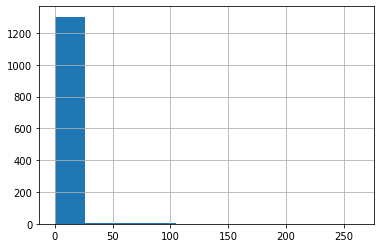

In [ ]:
dataset.PlanetaryMassJpt.hist()


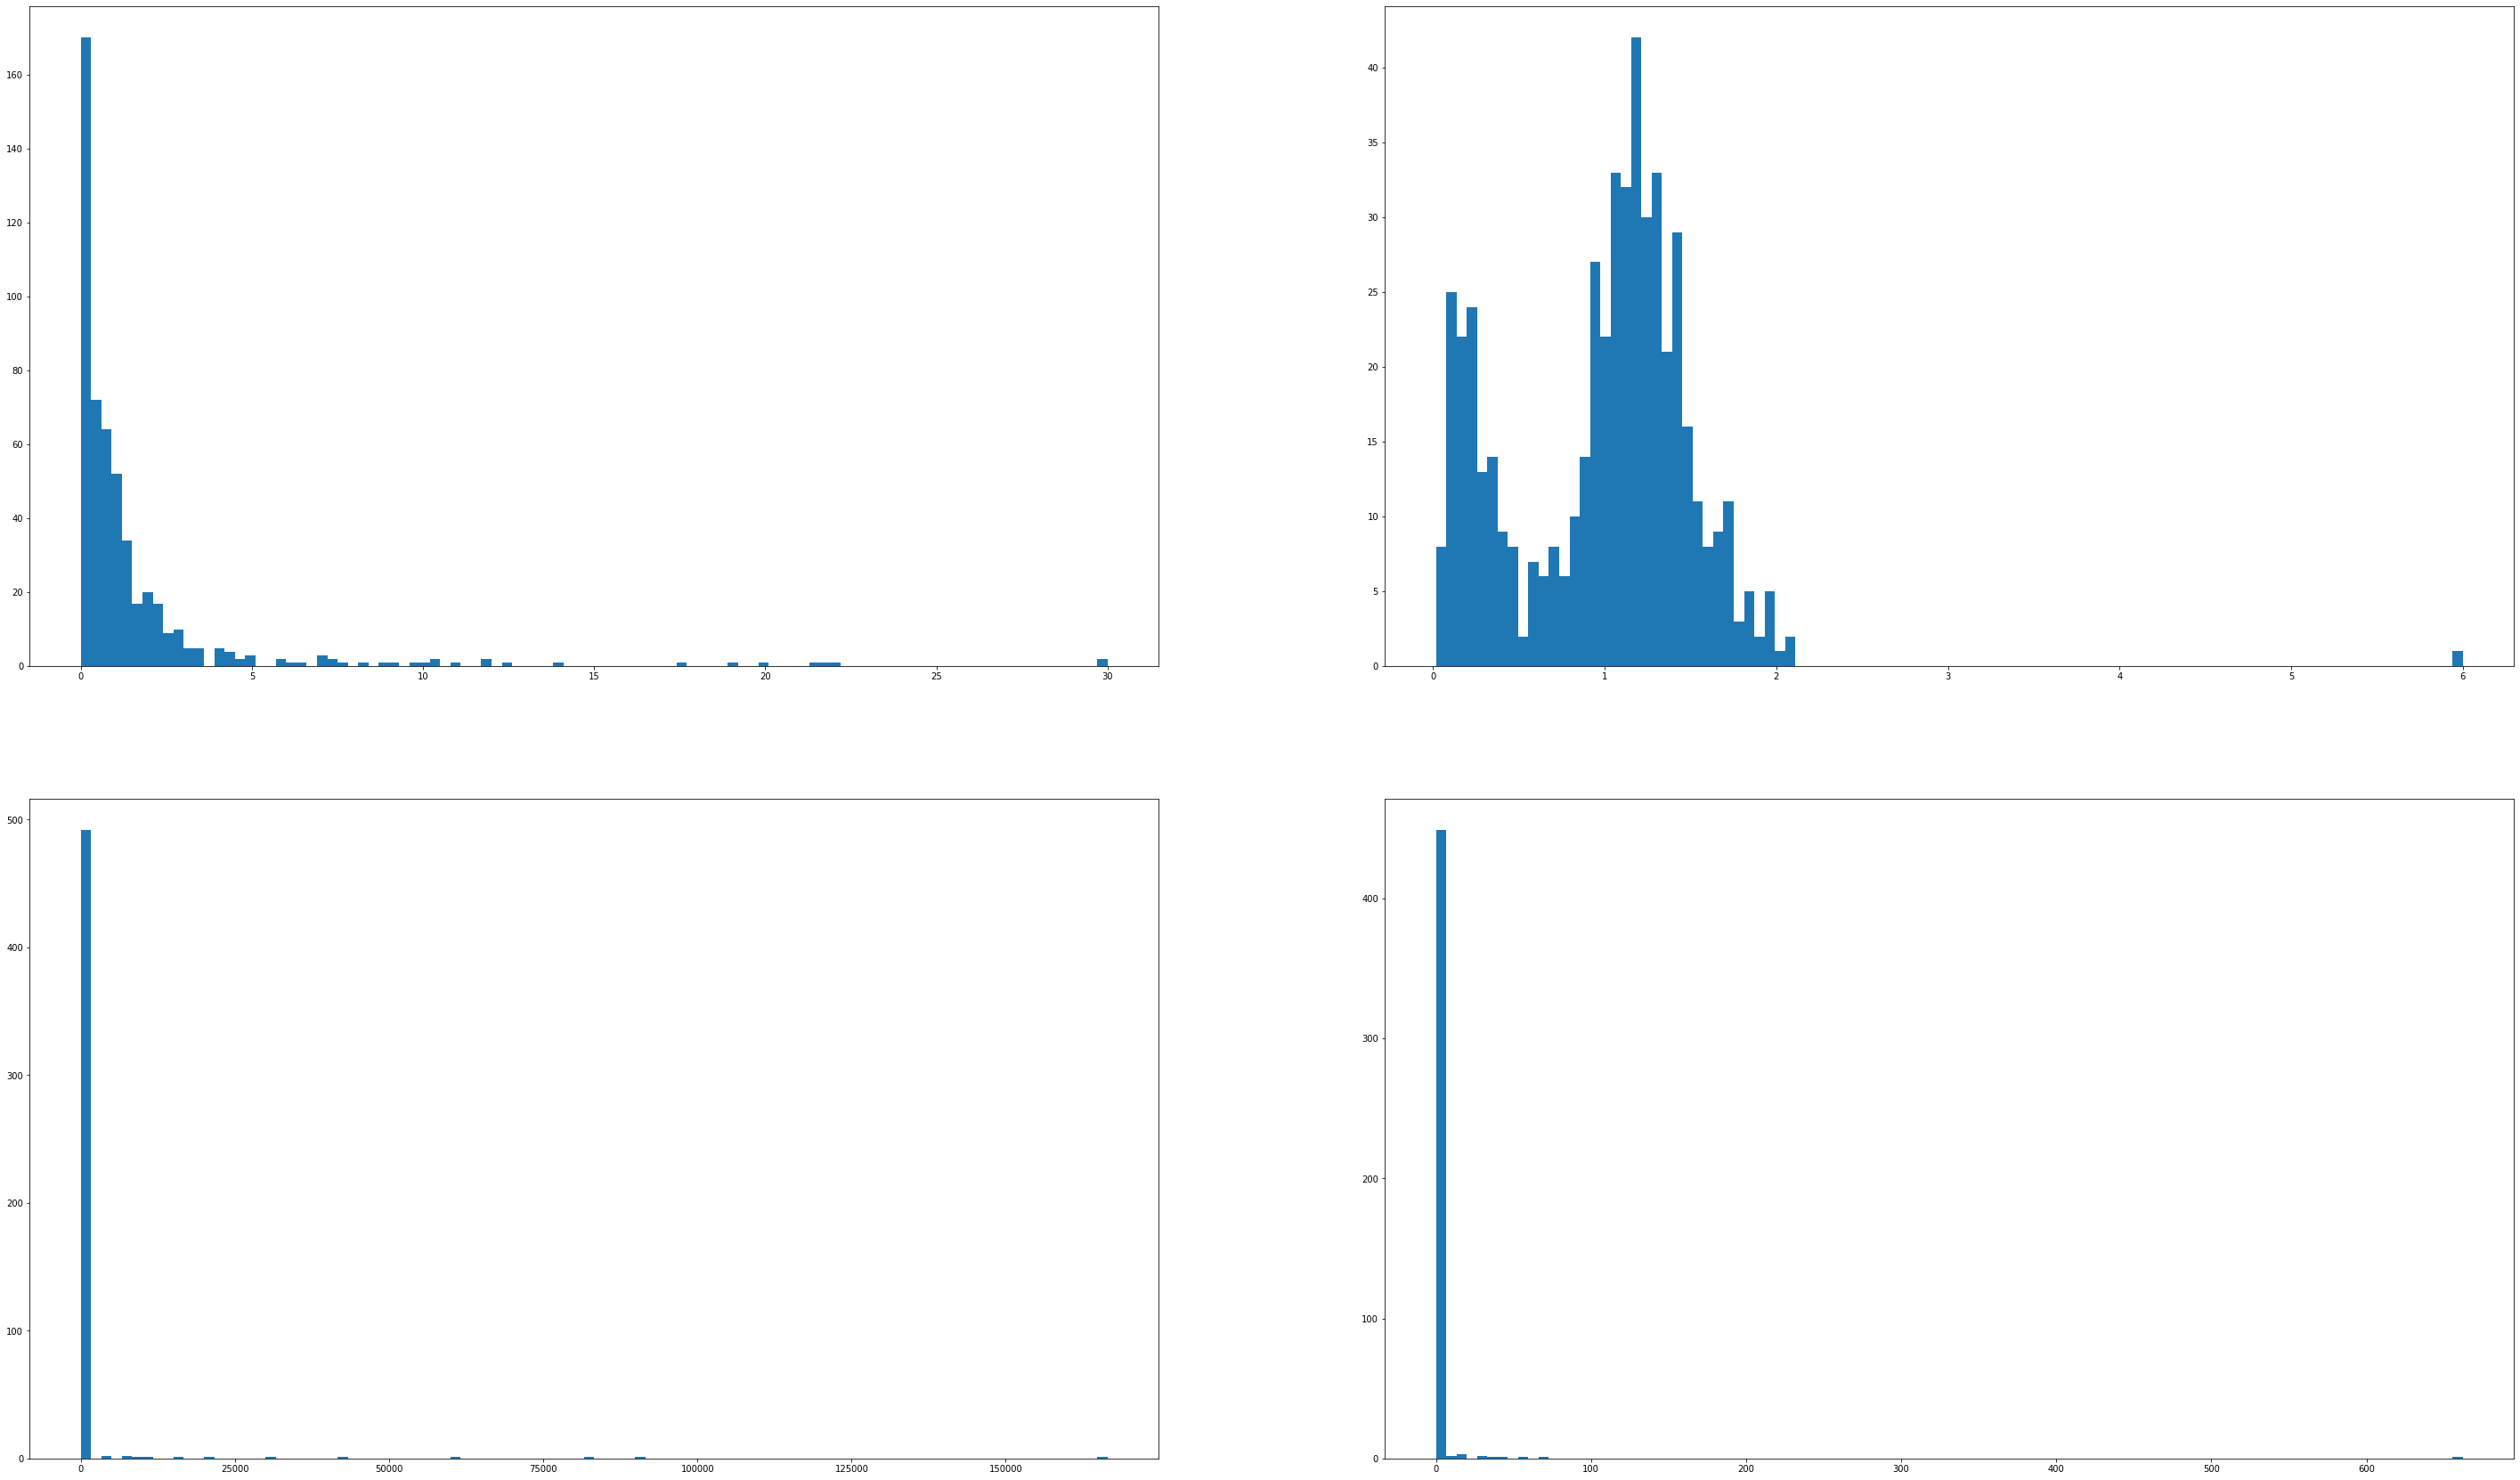

In [ ]:
fig, axes = plt.subplots(2, 2,figsize=(50,30))
axes[0,0].hist(dataset["PlanetaryMassJpt"],bins=100)
axes[0,1].hist(dataset["RadiusJpt"],bins=100)
axes[1,0].hist(dataset["PeriodDays"],bins=100)
axes[1,1].hist(dataset["SemiMajorAxisAU"],bins=100)
plt.show()

Планеты солнечной системы

In [104]:
solar_system = dataset[dataset["ListsPlanetIsOn"]=="Solar System"]
solar_system

,PlanetIdentifier,TypeFlag,PlanetaryMassJpt,RadiusJpt,PeriodDays,SemiMajorAxisAU,Eccentricity,PeriastronDeg,LongitudeDeg,AscendingNodeDeg,InclinationDeg,SurfaceTempK,AgeGyr,DiscoveryMethod,DiscoveryYear,LastUpdated,RightAscension,Declination,DistFromSunParsec,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarMetallicity,HostStarTempK,HostStarAgeGyr,ListsPlanetIsOn,PlanetaryMassJptlog,RadiusJptlog,cluster
408,Mercury,0,0.000174,0.034902,87.9700,0.387098,0.205637,77.457719,252.251667,48.339618,7.005594,NaN,NaN,NaN,NaN,12/01/01,NaN,NaN,NaN,1.0,1.0,1.000000e-08,5778.0,4.57,Solar System,-8.657179,-3.355225,1
409,Venus,0,0.002564,0.086565,224.7000,0.723321,0.006764,131.767557,181.979708,76.672615,3.397775,NaN,NaN,NaN,NaN,12/01/01,NaN,NaN,NaN,1.0,1.0,1.000000e-08,5778.0,4.57,Solar System,-5.966288,-2.446861,1
410,Earth,0,0.003146,0.091130,365.2422,1.000000,0.016732,102.930059,100.466916,-5.112604,-0.000543,NaN,NaN,NaN,NaN,12/01/01,NaN,NaN,NaN,1.0,1.0,1.000000e-08,5778.0,4.57,Solar System,-5.761719,-2.395465,1
411,Mars,0,0.000338,0.048489,686.9800,1.523712,0.093365,-23.917448,-4.568132,49.713210,1.851819,NaN,NaN,NaN,NaN,12/01/01,NaN,NaN,NaN,1.0,1.0,1.000000e-08,5778.0,4.57,Solar System,-7.992479,-3.026417,1
412,Jupiter,0,1.000000,1.000000,4332.8200,5.202480,0.048536,14.274952,34.334792,100.292827,1.298614,NaN,NaN,NaN,NaN,12/01/01,NaN,NaN,NaN,1.0,1.0,1.000000e-08,5778.0,4.57,Solar System,0.000000,0.000000,0
413,Saturn,0,0.299000,0.832944,10755.6700,9.541499,0.055508,92.861361,50.075713,113.639987,2.494241,NaN,NaN,NaN,NaN,12/01/01,NaN,NaN,NaN,1.0,1.0,1.000000e-08,5778.0,4.57,Solar System,-1.207312,-0.182789,0
414,Uranus,0,0.045700,0.362775,30687.1530,19.187979,0.046857,172.434044,314.202766,73.962502,0.772981,NaN,NaN,NaN,1781.0,12/01/01,NaN,NaN,NaN,1.0,1.0,1.000000e-08,5778.0,4.57,Solar System,-3.085657,-1.013972,1
415,Neptune,0,0.053953,0.352219,60190.0300,30.069528,0.008954,46.681587,304.222893,131.786359,1.770055,NaN,NaN,NaN,1846.0,12/01/01,NaN,NaN,NaN,1.0,1.0,1.000000e-08,5778.0,4.57,Solar System,-2.919642,-1.043501,1
416,Pluto,0,0.000008,0.016438,90553.0200,39.486860,0.248852,224.097026,238.965350,110.301680,17.141043,NaN,NaN,NaN,1930.0,12/01/01,NaN,NaN,NaN,1.0,1.0,1.000000e-08,5778.0,4.57,Solar System,-11.766768,-4.108166,1


Построим гистограммы для планет солнечной системы

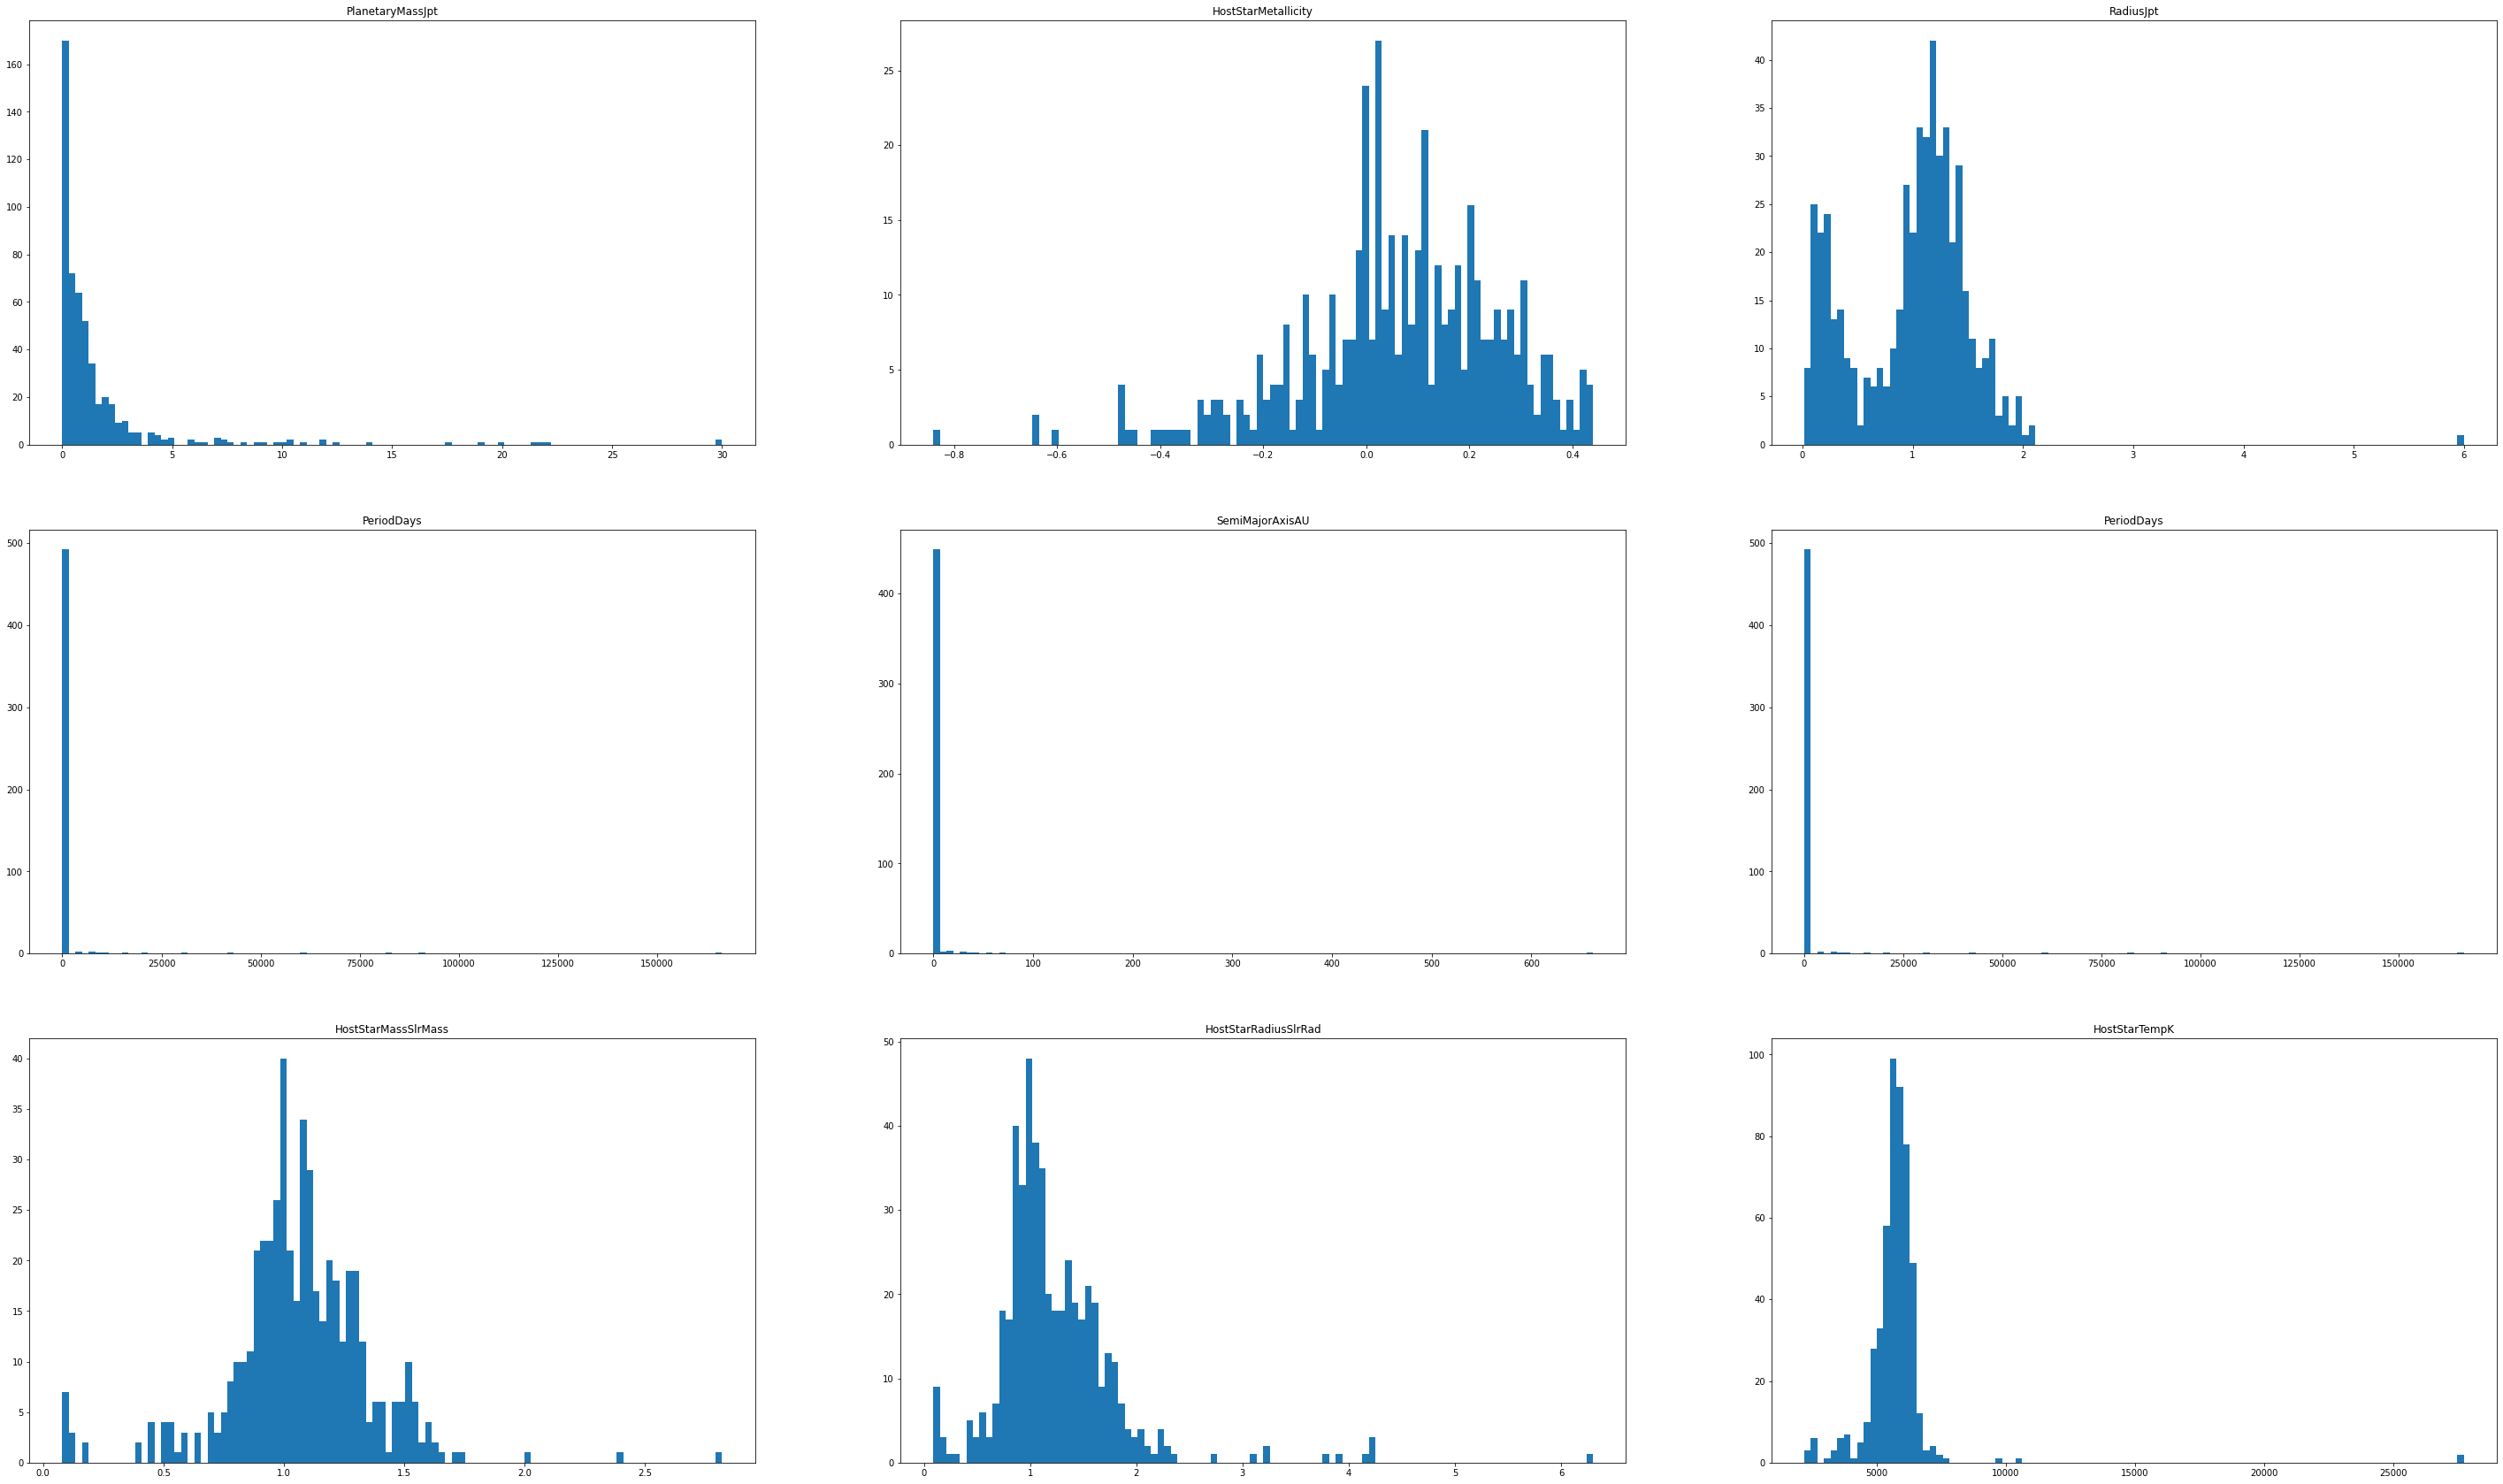

In [101]:
fig, axes = plt.subplots(3, 3,figsize=(50,30))
axes[0,0].hist(dataset["PlanetaryMassJpt"],bins=100)
axes[0,0].set_title("PlanetaryMassJpt")

axes[0,1].hist(dataset["HostStarMetallicity"],bins=100)
axes[0,1].set_title("HostStarMetallicity")

axes[0,2].hist(dataset["RadiusJpt"],bins=100)
axes[0,2].set_title("RadiusJpt")

axes[1,0].hist(dataset["PeriodDays"],bins=100)
axes[1,0].set_title("PeriodDays")

axes[1,1].hist(dataset["SemiMajorAxisAU"],bins=100)
axes[1,1].set_title("SemiMajorAxisAU")

axes[1,2].hist(dataset["PeriodDays"],bins=100)
axes[1,2].set_title("PeriodDays")

axes[2,0].hist(dataset["HostStarMassSlrMass"],bins=100)
axes[2,0].set_title("HostStarMassSlrMass")

axes[2,1].hist(dataset["HostStarRadiusSlrRad"],bins=100)
axes[2,1].set_title("HostStarRadiusSlrRad")

axes[2,2].hist(dataset["HostStarTempK"],bins=100)
axes[2,2].set_title("HostStarTempK")

plt.show()

Избавимся от пустых значений

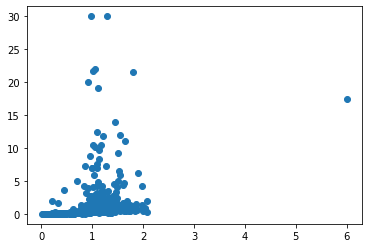

In [105]:
dataset=dataset.dropna(subset=['PlanetaryMassJpt', 'RadiusJpt']) 
plt.scatter(dataset["RadiusJpt"],dataset["PlanetaryMassJpt"])

Логарифмическая трансформация
Берем логарифмические значения переменных и проводим через них прямую линию

Наклон линии - степень многочлена

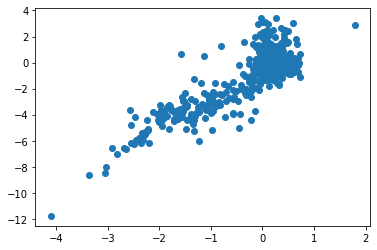

In [106]:
dataset["PlanetaryMassJptlog"]=dataset["PlanetaryMassJpt"].apply(np.log)
dataset["RadiusJptlog"]=dataset["RadiusJpt"].apply(np.log)

plt.scatter(dataset["RadiusJptlog"],dataset["PlanetaryMassJptlog"])

Применим популярный метод кластеризации "k средних", "k-means"

Разделим планеты на два кластера по массе и радиусу. В итоге они окажутся либо планетами земного типа, либо газовыми гигантами

К газовым гигантам относятся Юпитер, Сатурн, Уран и Нептун

К планетам земного типа - Меркурий, Венера, Земля и Марс


In [107]:
from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=2, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)

In [108]:
x_train=np.array(dataset[["RadiusJptlog","PlanetaryMassJptlog"]])
x_train

array([[-2.91877123, -6.57128304],
       [-0.17435339, -1.38629436],
       [-0.19845094, -1.77195684],
       ...,
       [ 0.02371653,  1.40192162],
       [ 0.73476886, -1.07880966],
       [ 0.17981843,  1.20237152]])

In [109]:
km.fit(x_train)
y_mean = km.fit_predict(x_train)

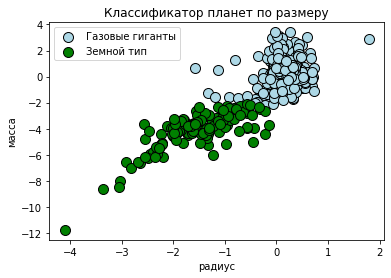

In [110]:
plt.scatter(
    X[y_mean == 0, 0], X[y_mean == 0, 1],
    s=100, c='lightblue',
    edgecolor='black',
    label='Газовые гиганты'
)

plt.scatter(
    X[y_mean == 1, 0], X[y_mean == 1, 1],
    s=100, c='green',
    edgecolor='black',
    label='Земной тип'
)
plt.title('Классификатор планет по размеру')
plt.xlabel('радиус')
plt.ylabel('масса')

plt.legend(scatterpoints=1)
plt.show()

Диаграмма температур планет

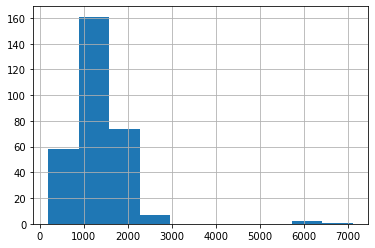

In [111]:
dataset.SurfaceTempK.hist()
 

Средняя температура всех экзопланет



In [114]:
 dataset.SurfaceTempK.mean()


1354.318481848184

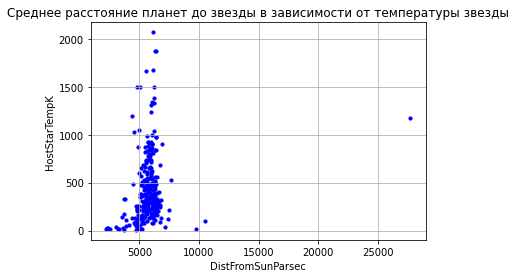

In [127]:
dist = dataset['DistFromSunParsec'].groupby([dataset['HostStarTempK']]).mean()
distY = dist
distX = dist.index

plt.grid()
plt.xlabel("DistFromSunParsec")
plt.ylabel("HostStarTempK")
plt.title("Среднее расстояние планет до звезды в зависимости от температуры звезды")

plt.scatter(distX, distY, 10, color="blue")
plt.plot(np.unique(distX), np.poly1d(np.polyfit(distX, distY, 1))(np.unique(distX)))

Попытаемся найти планеты, которые по своих характеристикам схожи с Землей

In [115]:
 solar_system.SurfaceTempK.mean()


nan